# In this notebook we will ingest and combine all of our data into one usable dataframe  

### Loading Pandas to manipulate our data

In [1]:
# !pip3 install pandas==2.0.0

In [2]:
import pandas as pd

## Setting working directory

In [3]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)


### Loading in covariate data that has colocalized CMAP features

In [4]:
covari_cmap_path = 'data_ingest/data/modified/Seaflow_covariates_CMAP.csv'
#using pandas to read in as a df
covari_cmap = (pd.read_csv(covari_cmap_path))
#making time a datatime object
covari_cmap['time'] = pd.to_datetime(covari_cmap['time'])

#dropping depth column which was used to to get CMAP Darwin Nutrient Climatology data
covari_cmap.drop('depth', axis=1, inplace=True)
#taking a peak at the data
print(len(covari_cmap))
covari_cmap.head(20)


10969


,time,cruise,lat,lon,abundance_prochloro,abundance_synecho,abundance_picoeuk,abundance_croco,diam_prochloro,diam_synecho,...,CMAP_fe_tblPisces_Forecast,CMAP_o2_tblPisces_Forecast,CMAP_no3_tblPisces_Forecast,CMAP_po4_tblPisces_Forecast,CMAP_si_tblPisces_Forecast,CMAP_fe_tblPisces_Forecast_cl1,CMAP_o2_tblPisces_Forecast_cl1,CMAP_no3_tblPisces_Forecast_cl1,CMAP_po4_tblPisces_Forecast_cl1,CMAP_si_tblPisces_Forecast_cl1
0,2010-05-21 18:00:00,W1005A,44.493300,-124.136800,0.246577,1.652478,13.346651,0.141894,0.907278,0.630084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-05-21 20:00:00,W1005A,44.251625,-124.195262,0.102905,2.733110,5.297041,0.039618,0.724296,0.590068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-05-21 21:00:00,W1005A,44.252489,-124.252939,0.086831,3.083692,5.410113,0.061919,0.869899,0.593229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-05-21 22:00:00,W1005A,44.252175,-124.290925,0.143867,2.961071,6.720226,0.109911,0.982521,0.601339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-21 23:00:00,W1005A,44.250991,-124.456800,0.299187,4.599585,6.459321,0.128636,0.878229,0.604964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-05-22 00:00:00,W1005A,44.251764,-124.711009,0.636155,3.779168,4.939703,0.034048,0.587510,0.596572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-05-22 01:00:00,W1005A,44.252125,-124.834563,0.411412,3.605853,6.233767,0.029839,0.752117,0.601911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-05-22 02:00:00,W1005A,44.251705,-124.974795,0.643085,4.429017,10.323529,0.024465,0.639234,0.603610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-05-22 03:00:00,W1005A,44.251595,-125.150547,0.194922,2.900974,7.308691,0.019701,0.887000,0.591040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-05-22 04:00:00,W1005A,44.248485,-125.165160,0.404941,2.785428,8.015600,0.017269,0.697642,0.587670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Writing a function to combine the data from all 3 pisces tables so we have continuous nutrient data

In [5]:
import pandas as pd
import numpy as np

def combine_columns(df, columns_base, columns_fill):
    for c in columns_base:
        for f in columns_fill:
            df[c] = df[c].fillna(df[f])
    return df

columns_base = ['CMAP_Fe_tblPisces_NRT', 'CMAP_O2_tblPisces_NRT', 'CMAP_NO3_tblPisces_NRT', 'CMAP_PO4_tblPisces_NRT', 'CMAP_Si_tblPisces_NRT']
columns_fill = ['CMAP_fe_tblPisces_Forecast', 'CMAP_o2_tblPisces_Forecast', 'CMAP_no3_tblPisces_Forecast', 'CMAP_po4_tblPisces_Forecast', 'CMAP_si_tblPisces_Forecast']
columns_fill2 = ['CMAP_fe_tblPisces_Forecast_cl1','CMAP_o2_tblPisces_Forecast_cl1', 'CMAP_no3_tblPisces_Forecast_cl1', 'CMAP_po4_tblPisces_Forecast_cl1', 'CMAP_si_tblPisces_Forecast_cl1']
combined = combine_columns(covari_cmap, columns_base, columns_fill)
combined = combine_columns(combined, columns_base, columns_fill2)


In [6]:
combined = combined.drop(columns_fill, axis=1)
combined = combined.drop(columns_fill2, axis=1)

print(combined.isna().sum())

time                                                      0
cruise                                                    0
lat                                                       0
lon                                                       0
abundance_prochloro                                       0
abundance_synecho                                         0
abundance_picoeuk                                         0
abundance_croco                                           0
diam_prochloro                                            0
diam_synecho                                              0
diam_picoeuk                                              0
diam_croco                                                0
Qc_prochloro                                              0
Qc_synecho                                                0
Qc_picoeuk                                                0
Qc_croco                                                  0
biomass_prochloro                       

In [7]:
combined.dropna(inplace=True)
print(combined.isna().sum())

time                                                   0
cruise                                                 0
lat                                                    0
lon                                                    0
abundance_prochloro                                    0
abundance_synecho                                      0
abundance_picoeuk                                      0
abundance_croco                                        0
diam_prochloro                                         0
diam_synecho                                           0
diam_picoeuk                                           0
diam_croco                                             0
Qc_prochloro                                           0
Qc_synecho                                             0
Qc_picoeuk                                             0
Qc_croco                                               0
biomass_prochloro                                      0
biomass_synecho                

## Creating Hours since sunrise Variable:

This was added in hopes that it would help capture the daily differnce in magnifutude of biomass that the model underrepresents.

ephem is a python package for performing high-precision astronomy computations

In [8]:
import pandas as pd
import ephem

# Convert 'time' column to datetime format
combined['time'] = pd.to_datetime(combined['time']).dt.strftime('%Y/%m/%d %H:%M:%S')

# function to calculate sunrise and hours since sunrise
def calculate_hours_since_sunrise(row):
    """
    Both the dataframe and ephem need to be in the same time zone (in this case UTC).
    UTC is standard for ephem
    """
    
    #defining the ephem observer spatial temporal values to find previous sinrise time
    obs = ephem.Observer()
    obs.lat = str(row['lat'])
    obs.long = str(row['lon'])
    obs.date = row['time']
    
    #determining sunrise for each lat/lon/time
    sunrise = str(obs.previous_rising(ephem.Sun())) # 
    sunrise = pd.to_datetime(sunrise)
    
    #changing time column to datetime object
    row['time'] = pd.to_datetime(row['time'])
    
    row['sunrise'] = sunrise
    
    #calcualting hours since sunrise
    row['hours_since_sunrise'] = (row['time'] - sunrise).total_seconds() / 3600

    return row

# Apply the function to each row using apply
combined = combined.apply(calculate_hours_since_sunrise, axis=1)

# Print the resulting DataFrame
combined


KeyboardInterrupt: 

### Checking accuracy of hours since sunrise by comparing it to the ship's PAR sensor

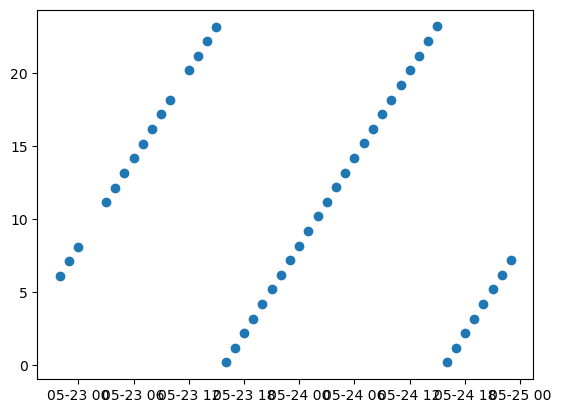

In [ ]:
# Checking that the hours since sunrise are correct
import matplotlib.pyplot as plt

cruise1_ = combined[combined['cruise'] == 'KM1508']

#scatter because if you try a trace it goes all over the place
plt.scatter(cruise1_['time'], cruise1_['hours_since_sunrise'])


### There are some values over 24 hours, but only by a few minuites likely due to changing postion of the ship through its route.

In [ ]:
combined[combined['hours_since_sunrise'] > 24]

,time,cruise,lat,lon,abundance_prochloro,abundance_synecho,abundance_picoeuk,abundance_croco,diam_prochloro,diam_synecho,...,CMAP_sst_tblSST_AVHRR_OI_NRT,CMAP_ugos_tblAltimetry_REP_Signal,CMAP_vgos_tblAltimetry_REP_Signal,CMAP_Fe_tblPisces_NRT,CMAP_O2_tblPisces_NRT,CMAP_NO3_tblPisces_NRT,CMAP_PO4_tblPisces_NRT,CMAP_Si_tblPisces_NRT,sunrise,hours_since_sunrise
9108,2021-12-11 16:00:00,TN397,9.2499,-148.6965,131.93699,2.908978,2.357603,0.019013,0.550368,0.974082,...,27.206245,0.153415,-0.087871,0.000014,0.000014,0.000014,0.000014,0.000014,2021-12-10 15:59:38,24.006111


### Dropping sunrise time column

In [ ]:
print(combined.dtypes)

time                                                   datetime64[ns]
cruise                                                         object
lat                                                           float64
lon                                                           float64
abundance_prochloro                                           float64
abundance_synecho                                             float64
abundance_picoeuk                                             float64
abundance_croco                                               float64
diam_prochloro                                                float64
diam_synecho                                                  float64
diam_picoeuk                                                  float64
diam_croco                                                    float64
Qc_prochloro                                                  float64
Qc_synecho                                                    float64
Qc_picoeuk          

In [ ]:
combined.drop(['sunrise'], axis = 1, inplace=True)

## saving as a CSV file

In [ ]:
combined.to_csv('data_ingest/data/modified/Seaflow_covari_CMAP_PAR.csv', index=False)